# Para el correcto funcionamiento del código, deben cargar los archivos .CSV a la pantalla principal de Jupyter Notebook. 

# Se importan Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Carga de Datos

In [2]:
#se cargan los datos de los archivos .csv, haciendo uso de la librería pandas se almacenan en dataframes con sus correspondientes nombres
Tabla_1 = pd.read_csv('Tabla_1.csv', header = 0)
Features_data_set = pd.read_csv('Features data set.csv', header = 0)
sales_data_set = pd.read_csv('sales data-set.csv', header = 0)

In [3]:
#Se unen todos los datos, aquellos que se usarán como predictores y variable respuesta en un único dataframe
join_data = pd.merge(Features_data_set, sales_data_set, on = ['Store', 'Date'])
join_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [5]:
#Se eliminan aquellas filas con datos nulos
join_data.dropna(inplace=True)
join_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
6587,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False
6588,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False
6589,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False
6590,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False
6591,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [6]:
#a continuación se separan los datos de los días festivos para analizarlos por separado.
join_data_Holiday = join_data.query('IsHoliday_x == True')
join_data_no_Holiday = join_data.query('IsHoliday_x == False')

# KNN

Se separan los días festivos y los no festivos:

### Datos no festivos:

In [7]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y = join_data_no_Holiday["Weekly_Sales"].values
X = join_data_no_Holiday[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [8]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [9]:
#crea un modelo KNN con 5 "vecinos"
knn = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [10]:
#realiza una predicción en base a los datos de testeo
y_pred = knn.predict(X_test)
#se imprime las predicciones realizadas
print("Predicciones: {}".format(y_pred))

Predicciones: [31595.958  8795.072 52381.81  ...  9439.888  3721.736  6447.412]


In [11]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_knn = knn.score(X_test, y_test)
score_knn

0.23259052300707528

In [30]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds = knn.predict(X_test)

performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': (abs(preds - y_test)*100/abs(y_test))})

performance

<ipython-input-30-e36d033ef06e>:6: RuntimeWarning: divide by zero encountered in true_divide
  'Error': (abs(preds - y_test)*100/abs(y_test))})


,True Value,Prediction,Error
0,16849.62,31595.958,87.517333
1,251.50,8795.072,3397.046521
2,81644.24,52381.810,35.841389
3,40078.32,69364.128,73.071446
4,3720.24,5357.912,44.020601
...,...,...,...
17408,90110.59,13818.578,84.664868
17409,52965.88,17077.154,67.758198
17410,30362.40,9439.888,68.909283
17411,5852.37,3721.736,36.406345


In [14]:
#a continuación se verifica la precisión de forma "manual" en base a un treshold menor al 30% de error
performance["acceptance_criteria"] = 0
performance.loc[performance.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance)

,True Value,Prediction,Error,acceptance_criteria
0,16849.62,31595.958,87.517333,0
1,251.50,8795.072,3397.046521,0
2,81644.24,52381.810,35.841389,0
3,40078.32,69364.128,73.071446,0
4,3720.24,5357.912,44.020601,0
...,...,...,...,...
17408,90110.59,13818.578,84.664868,0
17409,52965.88,17077.154,67.758198,0
17410,30362.40,9439.888,68.909283,0
17411,5852.37,3721.736,36.406345,0


In [15]:
len(performance.query('Error<=30').index)

3822

In [16]:
(len(performance.index))

17413

In [17]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance.query('Error<=30').index)/(len(performance.index))

0.21949118474702808

Actualmente el valor obtenido es cercano al obtenido por la función .score

1.   **Score**: 0.2258022669777655
2.   **Precisión manual**: 0.2255211623499684

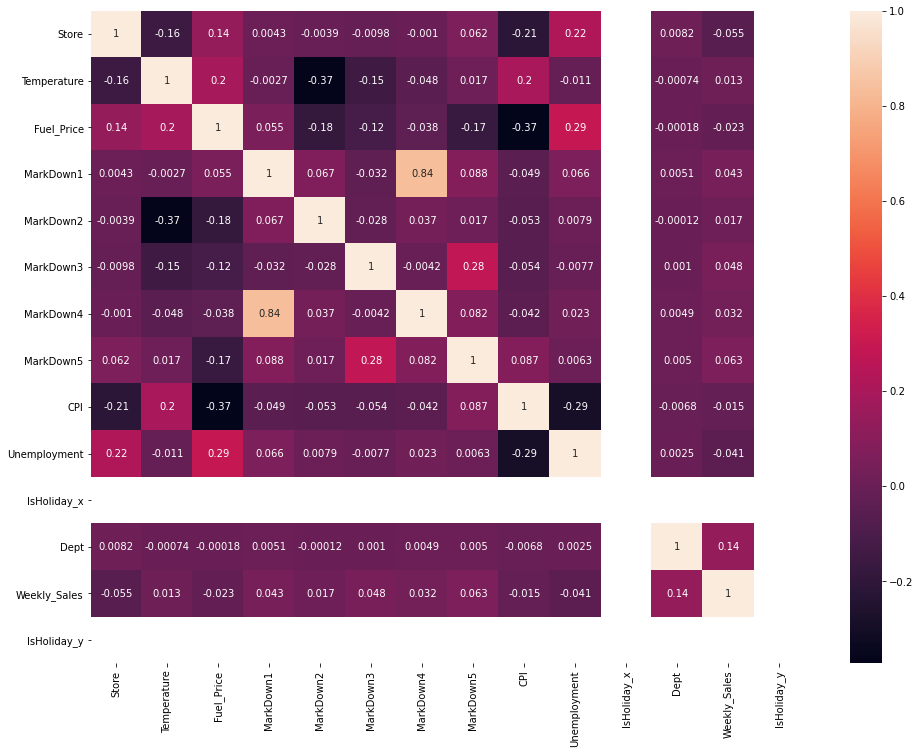

In [18]:
corr_datos = join_data_no_Holiday.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_datos, annot=True)
plt.show()

Mediante el gráfico de correlación, se puede observar que los datos de "Markdown1" y "Markdown4" poseen la mayor correlación

### Datos festivos:

In [31]:
#se crean arrays para las características y la variable de destino en el caso de dias festivos.
y_H = join_data_Holiday["Weekly_Sales"].values
X_H = join_data_Holiday[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [32]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X_H, y_H, test_size= 0.2)

#crea un modelo KNN con 5 "vecinos"
knn_H = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn_H.fit(X_train_H, y_train_H)


KNeighborsRegressor()

In [34]:
#realiza una predicción en base a los datos de testeo
y_pred_H = knn_H.predict(X_test_H)
#se imprime las predicciones realizadas
print("Predicciones festivas: {}".format(y_pred_H))

Predicciones festivas: [ 8371.2   16211.784  7288.878 ... 18518.274  6210.588  4577.048]


In [44]:
#se verifica la precisión con los datos de testeo
score_knn_H = knn_H.score(X_test_H, y_test_H)
score_knn_H

0.15089948362791028

In [35]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds_H = knn_H.predict(X_test_H)

performance_H = pd.DataFrame({ 'True Value': y_test_H,
                            'Prediction': preds_H,
                            'Error': (abs(preds_H - y_test_H)*100)/y_test_H})

performance_H

,True Value,Prediction,Error
0,2475.00,8371.200,238.230303
1,1730.52,16211.784,836.815755
2,7222.01,7288.878,0.925892
3,92668.44,8753.410,90.554055
4,11124.01,2892.292,73.999556
...,...,...,...
1994,23436.95,48284.590,106.019085
1995,895.00,1086.436,21.389497
1996,23144.59,18518.274,19.988758
1997,2947.07,6210.588,110.737716


In [36]:
#a continuación se verifica la precisión de forma "manual" en base a un treshold menor al 30% de error
performance_H["acceptance_criteria"] = 0
performance_H.loc[performance_H.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance_H)

,True Value,Prediction,Error,acceptance_criteria
0,2475.00,8371.200,238.230303,0
1,1730.52,16211.784,836.815755,0
2,7222.01,7288.878,0.925892,1
3,92668.44,8753.410,90.554055,0
4,11124.01,2892.292,73.999556,0
...,...,...,...,...
1994,23436.95,48284.590,106.019085,0
1995,895.00,1086.436,21.389497,1
1996,23144.59,18518.274,19.988758,1
1997,2947.07,6210.588,110.737716,0


In [39]:
len(performance_H.query('Error<=30').index)

419

In [49]:
(len(performance_H.index))

1999

In [50]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance_H.query('Error<=30').index)/(len(performance_H.index))

0.21660830415207605

Actualmente el valor obtenido es cercano al obtenido por la función .score

1.   **Score**: 0.1322228498354584
2.   **Precisión manual**: 0.2111055527763882

## Segundo set
Donde se realiza un balanceo de datos para la columna "Weekly_Sales"

### Datos no festivos:

In [40]:
#se agrupa el conjunto de datos en los que las ventas semanales sean como máximo 30000
Data_Weekly_Sales_Cheap = join_data_no_Holiday.query('Weekly_Sales <= 30000')
len(Data_Weekly_Sales_Cheap)

70856

In [41]:
len(join_data_no_Holiday.query('Weekly_Sales > 30000'))

16208

In [42]:
#se escojen 20000 datos al azar del conjunto de datos anteriormente creado y se concatenan con aquellos datos de las ventas semanales cuyo valor sea mayor a 30000
join_data_no_Holiday2 = pd.concat([Data_Weekly_Sales_Cheap.sample(n=20000), join_data_no_Holiday.query('Weekly_Sales > 30000')])

A continuación se procede a realizar en entrenamiento de manera homóloga al set 1

In [44]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y2 = join_data_no_Holiday2["Weekly_Sales"].values
X2 = join_data_no_Holiday2[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.2)

In [46]:
#crea un modelo KNN con 5 "vecinos"
knn2 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el nuevo regresor
knn2.fit(X_train2, y_train2)

KNeighborsRegressor()

In [47]:
#realiza una predicción en base a los datos de testeo
y_pred2 = knn2.predict(X_test2)
#se imprime las predicciones realizadas
print("Predicciones set 2: {}".format(y_pred2))

Predicciones set 2: [ 8029.568 90615.582 23531.71  ...  3809.498 50672.106 20713.734]


In [48]:
#se verifica la precisión con los datos de testeo
score_knn2 = knn2.score(X_test2, y_test2)
score_knn2

0.13711078836332058

In [49]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds2 = knn2.predict(X_test2)

performance2 = pd.DataFrame({ 'True Value': y_test2,
                            'Prediction': preds2,
                            'Error': (abs(preds2 - y_test2)*100)/y_test2})

performance2

,True Value,Prediction,Error
0,101.10,8029.568,7842.203759
1,89179.82,90615.582,1.609963
2,13982.89,23531.710,68.289316
3,11673.55,33588.034,187.727675
4,40584.76,47414.632,16.828662
...,...,...,...
7237,30371.62,38181.276,25.713663
7238,32871.08,41414.848,25.991747
7239,1876.60,3809.498,103.000000
7240,19038.82,50672.106,166.151505


In [50]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance2["acceptance_criteria"] = 0
performance2.loc[performance2.query('Error<=15').index ,"acceptance_criteria"]=1
display(performance2)

,True Value,Prediction,Error,acceptance_criteria
0,101.10,8029.568,7842.203759,0
1,89179.82,90615.582,1.609963,1
2,13982.89,23531.710,68.289316,0
3,11673.55,33588.034,187.727675,0
4,40584.76,47414.632,16.828662,0
...,...,...,...,...
7237,30371.62,38181.276,25.713663,0
7238,32871.08,41414.848,25.991747,0
7239,1876.60,3809.498,103.000000,0
7240,19038.82,50672.106,166.151505,0


In [51]:
len(performance.query('Error<=30').index)

3776

In [52]:
(len(performance.index))

17413

In [53]:
len(performance2.query('Error<=30').index)

1534

In [54]:
(len(performance2.index))

7242

In [55]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance2.query('Error<=30').index)/(len(performance2.index))

0.21181993924330295

Actualmente el valor obtenido no es cercano al obtenido por la función .score para el set 2.

1.   **Score**: 0.16334375551144098
2.   **Precisión manual**: 0.20892018779342722

### Datos festivos:

Para realizar el proceso de igual manera en todo el set 2, se analiza si es necesario realizar nuevamente un balanceo de datos para la columna "Weekly_Sales"

In [56]:
len(join_data_Holiday)

9992

In [57]:
#se agrupa el conjunto de datos en los que las ventas semanales sean como máximo 30000
Data_Weekly_Sales_Cheap_Holyday = join_data_Holiday.query('Weekly_Sales <= 40000')
len(Data_Weekly_Sales_Cheap_Holyday)

8664

**analizar qué cantidad de datos es necesaria para realizar el balance, luego seguir los mismos pasos para todo.**

In [59]:
#se escojen 20000 datos al azar del conjunto de datos anteriormente creado y se concatenan con aquellos datos de las ventas semanales cuyo valor sea mayor a 30000
join_data_Holiday2 = pd.concat([Data_Weekly_Sales_Cheap_Holyday.sample(n=1500), join_data_Holiday.query('Weekly_Sales > 30000')])

Al observar el gráfico se observa que no es una gran mejora en el balanceo de los datos, pero intentar balancear con un conjunto más acotado de datos, sería perjudicial para el modelo.

In [60]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_H2 = join_data_Holiday2["Weekly_Sales"].values
X_H2 = join_data_Holiday2[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [61]:
X_train_H2, X_test_H2, y_train_H2, y_test_H2 = train_test_split(X_H2, y_H2, test_size= 0.2)

In [62]:
#crea un modelo KNN con 5 "vecinos"
knn_H2 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el nuevo regresor
knn_H2.fit(X_train_H2, y_train_H2)

KNeighborsRegressor()

In [63]:
#realiza una predicción en base a los datos de testeo
y_pred_H2 = knn_H2.predict(X_test_H2)
#se imprime las predicciones realizadas
print("Predicciones festivas del set 2: {}".format(y_pred_H2))

Predicciones festivas del set 2: [ 84112.126  19167.366   6288.888  21440.278  22321.116  43683.482
  18973.78   29604.458  30131.182  64311.47   23286.772  29744.204
  69612.772  24391.786 103355.096  40137.98   40615.074  21976.664
  36866.63   33504.14   60789.032  35398.046  44694.218  24785.118
  36227.436  72678.274  50569.032  70954.034  36227.436  77230.838
  81850.468   5000.026  15720.092  34490.158  66034.926  21545.194
  38169.58   47180.404  44021.632  54570.952  70141.234  33246.468
  20395.932  54612.828  48667.094  44004.47   61982.29   22805.408
  38332.774  17659.118  54794.     32810.89   20638.106  42013.576
  35636.222  39892.708  23615.758  16994.19   31383.438  29937.434
  10872.78   61368.176  71030.31   37519.804  48340.044  14526.542
  86641.706  27967.372  37038.342  37519.804  25178.264  68589.462
  15916.9    27583.386   7196.018  49107.544  67946.262  38099.986
  59533.912 102703.786  47724.378   8660.36   11932.302  14530.634
  92606.756  21882.062  14304

In [64]:
#se verifica la precisión con los datos de testeo
score_knn_H2 = knn_H2.score(X_test_H2, y_test_H2)
score_knn_H2

-0.02667746742538779

In [65]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds_H2 = knn_H2.predict(X_test_H2)

performance_H2 = pd.DataFrame({ 'True Value': y_test_H2,
                            'Prediction': preds_H2,
                            'Error': (abs(preds_H2 - y_test_H2)*100)/y_test_H2})

performance_H2

,True Value,Prediction,Error
0,34669.52,84112.126,142.611164
1,9429.93,19167.366,103.260957
2,9508.00,6288.888,33.856878
3,7943.62,21440.278,169.905635
4,6313.06,22321.116,253.570471
...,...,...,...
680,26659.45,30430.326,14.144613
681,160693.21,83322.132,48.148318
682,39482.84,36989.444,6.315138
683,7015.59,5000.026,28.729786


In [66]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance_H2["acceptance_criteria"] = 0
performance_H2.loc[performance_H2.query('Error<=15').index ,"acceptance_criteria"]=1
display(performance_H2)

,True Value,Prediction,Error,acceptance_criteria
0,34669.52,84112.126,142.611164,0
1,9429.93,19167.366,103.260957,0
2,9508.00,6288.888,33.856878,0
3,7943.62,21440.278,169.905635,0
4,6313.06,22321.116,253.570471,0
...,...,...,...,...
680,26659.45,30430.326,14.144613,1
681,160693.21,83322.132,48.148318,0
682,39482.84,36989.444,6.315138,1
683,7015.59,5000.026,28.729786,0


In [67]:
len(performance_H2.query('Error<=30').index)

169

In [68]:
(len(performance_H2.index))

685

In [69]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance_H2.query('Error<=30').index)/(len(performance_H2.index))

0.24671532846715327

Nuevamente el valor obtenido no es cercano al obtenido por la función .score

1.   **Score**: 0.1455394750654706
2.   **Precisión manual**: 0.20947252140292738

## Tercer set

Para el tercer set se promediarán los datos de rebajas de Markdowns, disminuyendo la carga computacional para el modelo.

### Datos no festivos:

In [70]:
Features_data_set['MarkDowns'] = Features_data_set[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']].mean(axis=1)
Features_data_set

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MarkDowns
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,NaN
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,NaN
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,NaN
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,NaN
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,2287.996
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,3850.840
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,1719.634
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,1127.042


In [71]:
Features_data_set3 = Features_data_set.drop(columns = ['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [72]:
join_data_set3 = pd.merge(Features_data_set3, sales_data_set, on = ['Store', 'Date'])
join_data_set3

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,MarkDowns,Dept,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,1,24924.50,False
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,2,50605.27,False
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,3,13740.12,False
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,4,39954.04,False
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,97,6817.48,False


In [73]:
#Se eliminan aquellas filas con datos nulos
join_data_set3.dropna(inplace=True)
join_data_set3

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,MarkDowns,Dept,Weekly_Sales,IsHoliday_y
6587,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,1,18689.54,False
6588,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,2,44936.47,False
6589,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,3,9959.64,False
6590,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,4,36826.52,False
6591,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,5,31002.65,False
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,97,6817.48,False


In [74]:
#a continuación se separan los datos de los días festivos para analizarlos por separado.
join_data_Holiday_set3 = join_data_set3.query('IsHoliday_x == True')
join_data_no_Holiday_set3 = join_data_set3.query('IsHoliday_x == False')

In [77]:
join_data_no_Holiday_set3.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday_x', 'MarkDowns', 'Dept', 'Weekly_Sales', 'IsHoliday_y'],
      dtype='object')

In [78]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y3 = join_data_no_Holiday_set3["Weekly_Sales"].values
X3 = join_data_no_Holiday_set3[["Dept","Fuel_Price", "CPI", "Unemployment", "MarkDowns"]].values

In [79]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size= 0.2)

#crea un modelo KNN con 5 "vecinos"
knn3 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn3.fit(X_train3, y_train3)


KNeighborsRegressor()

In [80]:
#realiza una predicción en base a los datos de testeo
y_pred3 = knn3.predict(X_test3)
#se imprime las predicciones realizadas
print("Predicciones set 3: {}".format(y_pred3))

Predicciones set 3: [23444.696 23602.714  3880.788 ...  5225.222 61130.776  4747.908]


In [81]:
#se verifica la precisión con los datos de testeo
score_knn3 = knn3.score(X_test3, y_test3)
score_knn3

0.2841173898841125

In [82]:
#a continuación se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds3 = knn3.predict(X_test3)

performance3 = pd.DataFrame({ 'True Value': y_test3,
                            'Prediction': preds3,
                            'Error': (abs(preds3 - y_test3)*100)/y_test3})

performance3

<ipython-input-82-4d23f6cf3785>:6: RuntimeWarning: divide by zero encountered in true_divide
  'Error': (abs(preds3 - y_test3)*100)/y_test3})


,True Value,Prediction,Error
0,25846.94,23444.696,9.294114
1,12114.32,23602.714,94.833173
2,167.20,3880.788,2221.045455
3,19.49,1308.412,6613.247819
4,28320.89,8261.194,70.830034
...,...,...,...
27884,10137.75,25530.804,151.838958
27885,2093.97,10872.178,419.213647
27886,2647.93,5225.222,97.332331
27887,62939.08,61130.776,2.873102


In [83]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance3["acceptance_criteria"] = 0
performance3.loc[performance3.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance3)

,True Value,Prediction,Error,acceptance_criteria
0,25846.94,23444.696,9.294114,1
1,12114.32,23602.714,94.833173,0
2,167.20,3880.788,2221.045455,0
3,19.49,1308.412,6613.247819,0
4,28320.89,8261.194,70.830034,0
...,...,...,...,...
27884,10137.75,25530.804,151.838958,0
27885,2093.97,10872.178,419.213647,0
27886,2647.93,5225.222,97.332331,0
27887,62939.08,61130.776,2.873102,1


In [84]:
len(performance3.query('Error<=30').index)

6068

In [85]:
(len(performance3.index))

27889

In [86]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance3.query('Error<=30').index)/(len(performance3.index))

0.217576822403098

El actual valor obtenido sigue sin ser similar al obtenido por la función .score, pero a mejorado bastante, es por ello, que este ha sido el mejor modelo obtenido para KNN.

1.   **Score**: 0.2891043446645618
2.   **Precisión manual**: 0.21746925311054538

### Datos festivos:

In [87]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_H3 = join_data_Holiday_set3["Weekly_Sales"].values
X_H3 = join_data_Holiday_set3[["Dept","Fuel_Price", "CPI", "Unemployment", "MarkDowns"]].values

In [88]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train_H3, X_test_H3, y_train_H3, y_test_H3 = train_test_split(X_H3, y_H3, test_size= 0.2)

#crea un modelo KNN con 5 "vecinos"
knn_H3 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn_H3.fit(X_train_H3, y_train_H3)


KNeighborsRegressor()

In [89]:
#realiza una predicción en base a los datos de testeo
y_pred_H3 = knn_H3.predict(X_test_H3)
#se imprime las predicciones realizadas
print("Predicciones festivas del set 3: {}".format(y_pred_H3))

Predicciones festivas del set 3: [47005.082 59158.368 22988.932 ...  3727.502  7098.998 18039.948]


In [90]:
#se verifica la precisión con los datos de testeo
score_knn_H3 = knn_H3.score(X_test_H3, y_test_H3)
score_knn_H3

0.15419853069295575

In [91]:
#a continuación se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds_H3 = knn_H3.predict(X_test_H3)

performance_H3 = pd.DataFrame({ 'True Value': y_test_H3,
                            'Prediction': preds_H3,
                            'Error': (abs(preds_H3 - y_test_H3)*100)/y_test_H3})

performance_H3

,True Value,Prediction,Error
0,12070.09,47005.082,289.434395
1,29240.10,59158.368,102.319308
2,20044.37,22988.932,14.690220
3,1583.87,10032.740,533.432037
4,31196.11,18502.408,40.690016
...,...,...,...
2394,14.82,1665.782,11140.094467
2395,4916.16,5551.660,12.926756
2396,2471.74,3727.502,50.804777
2397,9524.48,7098.998,25.465768


In [92]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance_H3["acceptance_criteria"] = 0
performance_H3.loc[performance_H3.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance_H3)

,True Value,Prediction,Error,acceptance_criteria
0,12070.09,47005.082,289.434395,0
1,29240.10,59158.368,102.319308,0
2,20044.37,22988.932,14.690220,1
3,1583.87,10032.740,533.432037,0
4,31196.11,18502.408,40.690016,0
...,...,...,...,...
2394,14.82,1665.782,11140.094467,0
2395,4916.16,5551.660,12.926756,1
2396,2471.74,3727.502,50.804777,0
2397,9524.48,7098.998,25.465768,1


In [95]:
len(performance_H3.query('Error<=30').index)

450

In [96]:
(len(performance_H3.index))

2399

In [97]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance_H3.query('Error<=30').index)/(len(performance_H3.index))

0.18757815756565235

El valor obtenido sigue sin ser similar al obtenido por la función .score, pero este a mejorado bastante, es por ello, que este ha sido el mejor modelo obtenido para KNN con los siguientes datos.

1.   **Score**: 0.15406018673024635
2.   **Precisión manual**: 0.2113380575239683

Finalmente se decide hacer uso del set 3 de KNN para llevar a cabo la predicción con los datos de la Tabla1, dado a que el set 3 posee (a pesar de ser baja) una mayor presición que el resto de set's creados.

## Tabla1

### Procesamiento de datos

Primero se procesarán los datos de la tabla 1 para que queden acorde al funcionamiento del modelo KNN del set 3.

In [98]:
Tabla_1['MarkDowns'] = Tabla_1[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']].mean(axis=1)
Tabla_1

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,MarkDowns
0,0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,9691.276227,464.157260,21484.678945,15838.706634,10074.683942,216.603308,6.529,False,11510.700602
1,1,21,52,24/06/2011,169199.146654,False,59.608361,3.594,35052.144316,33433.615110,23406.818748,10586.568174,18348.012177,214.744111,7.931,False,24165.431705
2,2,9,24,27/01/2012,76445.807545,False,16.623822,3.290,13763.521756,33784.341040,26138.012756,21585.291347,1582.360568,223.806053,5.667,False,19370.705493
3,3,6,60,05/08/2011,529384.632399,False,36.466380,3.684,7446.306499,2438.613334,5175.440486,10227.979090,8692.253401,217.083989,6.925,False,6796.118562
4,4,17,42,23/12/2011,590421.125970,False,92.396503,3.186,2679.329519,9565.582845,23651.312194,12981.884477,10443.878610,129.984548,6.617,False,11864.397529
5,5,31,87,24/08/2012,556894.615504,False,43.412585,3.620,74319.059467,37408.818862,18482.402292,20620.695196,3846.379089,221.808352,6.565,False,30935.470981
6,6,21,83,19/03/2010,682722.852234,False,52.963927,2.720,78985.685314,31341.343607,12708.044607,5875.072096,688.137256,210.873332,8.324,False,25919.656576
7,7,4,29,30/09/2011,70387.018913,False,74.145519,3.371,9436.763466,41393.898678,29216.144403,15784.237223,7165.225061,129.606067,5.644,False,20599.253766
8,8,20,16,24/12/2010,326232.854841,False,26.041172,3.141,3564.696521,5771.074248,18289.236301,4481.732712,405.051798,204.637673,7.484,False,6502.358316
9,9,22,46,27/05/2011,436981.323825,False,28.162576,4.034,85035.636423,4078.768416,20681.908333,3242.237108,12731.765498,138.678283,8.252,False,25154.063156


In [99]:
Tabla_1_processed = Tabla_1.drop(columns = ['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

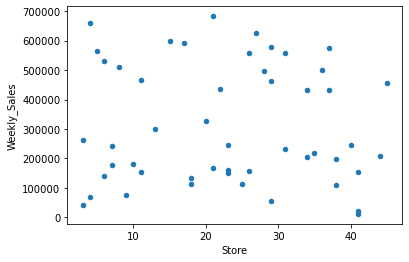

In [100]:
Tabla_1_processed.plot(kind = 'scatter', x = 'Store', y =  'Weekly_Sales')
plt.show()

In [101]:
#a continuación se separan los datos de los días festivos para analizarlos por separado.
Tabla_1_processed_Holiday = Tabla_1_processed.query('IsHoliday_x == True')
Tabla_1_processed_No_Holiday = Tabla_1_processed.query('IsHoliday_x == False')

In [102]:
Tabla_1_processed_Holiday

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,MarkDowns
21,21,27,50,10/02/2012,625880.623167,True,99.921138,3.826,141.119983,8.009,True,22938.224516


In [103]:
Tabla_1_processed_No_Holiday

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,MarkDowns
0,0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,216.603308,6.529,False,11510.700602
1,1,21,52,24/06/2011,169199.146654,False,59.608361,3.594,214.744111,7.931,False,24165.431705
2,2,9,24,27/01/2012,76445.807545,False,16.623822,3.290,223.806053,5.667,False,19370.705493
3,3,6,60,05/08/2011,529384.632399,False,36.466380,3.684,217.083989,6.925,False,6796.118562
4,4,17,42,23/12/2011,590421.125970,False,92.396503,3.186,129.984548,6.617,False,11864.397529
5,5,31,87,24/08/2012,556894.615504,False,43.412585,3.620,221.808352,6.565,False,30935.470981
6,6,21,83,19/03/2010,682722.852234,False,52.963927,2.720,210.873332,8.324,False,25919.656576
7,7,4,29,30/09/2011,70387.018913,False,74.145519,3.371,129.606067,5.644,False,20599.253766
8,8,20,16,24/12/2010,326232.854841,False,26.041172,3.141,204.637673,7.484,False,6502.358316
9,9,22,46,27/05/2011,436981.323825,False,28.162576,4.034,138.678283,8.252,False,25154.063156


Al observar que entre los datos de Tabla_1 solo se puede encontrar un día festivo, los datos no serán separados y se analizarán todos juntos.

In [105]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_Tabla_1 = Tabla_1_processed["Weekly_Sales"].values
X_Tabla_1 = Tabla_1_processed[["Dept","Fuel_Price", "CPI", "Unemployment", "MarkDowns"]].values

In [106]:
#realiza una predicción en base a los datos de testeo
y_pred_Tabla_1 = knn3.predict(X_Tabla_1)
#se imprime las predicciones realizadas
print("Predicciones en base a los datos de Tabla_1 en los dias no festivos:\n{}".format(y_pred_Tabla_1))

Predicciones en base a los datos de Tabla_1 en los dias no festivos:
[  7627.55    5338.458  16497.204   1198.75   21064.676  13438.082
  43628.188   2910.828  18588.958  11664.368  20315.708   9385.312
  14518.15   34002.292  14772.656  11476.508   1997.132  10211.18
  24777.062   7925.244  33518.8    12015.072  11920.386  24836.13
  17709.18  105790.432  26646.492  22970.224   2247.226   6625.198
  42510.474  17709.18    6764.736   1785.546  16876.852   7104.652
   2080.634   4915.454   7317.952  39997.822   1459.746   8134.244
  27712.506  55001.9     3200.448   6359.612   5062.118   8269.724
  17143.606  28626.97 ]


In [107]:
error_porcentual_KNN= (abs(y_pred_Tabla_1 - y_Tabla_1)*100)/y_Tabla_1
print(error_porcentual_KNN)

[ 98.648347    96.84486707  78.41974004  99.77355784  96.43226249
  97.58696141  93.60967809  95.8645386   94.30193565  97.33069416
  92.24620909  96.16746628  97.56993795  56.23998578  93.94408857
  94.77425971  99.53753747  93.40397143  94.28892376  95.04739048
  83.98586112  98.08029334  97.92238198  84.22981965  84.12960576
  81.75758688  51.21479308  90.09243391  98.54917659  96.33048386
 257.90260005  96.43156787  94.12251795  99.27110223  88.87764196
  98.47713795  99.62745407  97.60700053  94.73121934   1.3426864
  99.68511148  95.86781873  75.40389609  81.57483114  97.59470506
  98.73246841  99.01003727  98.74445854  90.32733469  93.74425761]


Tras analizar los datos obtenidos se observa que KNN no da una estimación certera de los datos, dado a que el set que mejor predicciones puede entregar posee una accuracy cercana al 28,9% es por ello que la predicción obtenida no es confiable y se recomienda buscar otra metodología más adecuada a el conjunto de datos con el cual se debe llevar a cabo el entrenamiento para la predicción necesaria.

# RF

Dado a que el comportamiento entre RF y KNN difiere, se usarán las mismas variantes en sus respectivos sets para comparar los resultados.

## Primer set
Haciendo uso de los datos disponibilisados se trabajará analizando por separado los dias festivos y no festivos.

### Datos no festivos:

In [108]:
#crea un modelo de random forest con los valores predeterminados.
rf = RandomForestRegressor()
#entrenamos el regresor
rf.fit(X_train, y_train)


RandomForestRegressor()

In [109]:
#se verifica el accuracy promedio con los datos de testeo a través de la función .score
score_rf = rf.score(X_test, y_test)
score_rf

0.8227370833895251

### Datos festivos:

In [110]:
#crea un modelo de random forest con los valores predeterminados.
rf_H = RandomForestRegressor()
#entrenamos el regresor
rf_H.fit(X_train_H, y_train_H)


RandomForestRegressor()

In [111]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf_H = rf.score(X_test_H, y_test_H)
score_rf_H

0.622285606370549

## Segundo set
Donde se realiza un balanceo de datos para la columna "Weekly_Sales"

### Datos no festivos:

In [112]:
#crea un modelo de random forest con los valores predeterminados.
rf2 = RandomForestRegressor()
#entrenamos el regresor
rf2.fit(X_train2, y_train2)


RandomForestRegressor()

In [113]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf2 = rf2.score(X_test2, y_test2)
score_rf2

0.8195111161254878

### Datos festivos:

In [114]:
#crea un modelo de random forest con los valores predeterminados.
rf_H2 = RandomForestRegressor()
#entrenamos el regresor
rf_H2.fit(X_train_H2, y_train_H2)


RandomForestRegressor()

In [115]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf_H2 = rf_H2.score(X_test_H2, y_test_H2)
score_rf_H2

0.7888088462591343

## Tercer set
Para el tercer set se promediarán los datos de rebajas de Markdowns, disminuyendo la carga computacional para el modelo.

### Datos no festivos:

In [116]:
#crea un modelo de random forest con los valores predeterminados.
rf3 = RandomForestRegressor()
#entrenamos el regresor
rf3.fit(X_train3, y_train3)


RandomForestRegressor()

In [117]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf3 = rf3.score(X_test3, y_test3)
score_rf3

0.7929499913275471

### Datos festivos:

In [118]:
#crea un modelo de random forest con los valores predeterminados.
rf_H3 = RandomForestRegressor()
#entrenamos el regresor
rf_H3.fit(X_train_H3, y_train_H3)


RandomForestRegressor()

In [119]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf_H3 = rf_H3.score(X_test_H3, y_test_H3)
score_rf_H3

0.758423695123684

En base a las precisiones obtenidas en los 3 set de datos, el mejor RF obtenido es el del set 2, es por ello que se elige este para el análisis de los datos de Tabla_1.

## Tabla1

### Procesamiento de datos

In [120]:
Tabla_1 = pd.read_csv('Tabla_1.csv', header = 0)

In [121]:
Tabla_1.columns

Index(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [122]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_Tabla_1_RF = Tabla_1["Weekly_Sales"].values
X_Tabla_1_RF = Tabla_1[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [123]:
#realiza una predicción en base a los datos de testeo
y_pred_Tabla_1_RF = rf2.predict(X_Tabla_1_RF)
#se imprime las predicciones realizadas
print("Predicciones en base a los datos de Tabla_1 con Random Forest:\n{}".format(y_pred_Tabla_1_RF))

Predicciones en base a los datos de Tabla_1 con Random Forest:
[13475.7024  7609.9621 14618.3952  4384.4531  5955.2154 41023.2761
  6618.3129 12361.3891 12467.5944 35282.5286 29156.6429  6124.7025
 12953.2184 25470.1767 31693.5461 13948.1067  1617.9995 28674.174
  3987.3731 47920.8151 74287.6216  5385.7642  7791.8795 40988.5723
 20207.1753 28244.0286 15723.3717 14447.1093 12115.6524  9282.2558
 32933.1081 63670.6272 10321.6675  9608.7388 24337.9436 11264.1255
 53031.8018 19028.1426  5632.7377 22319.3777 15619.8799 12431.0338
 72635.1281  9176.4399 12747.4668 16692.0254  8130.5594 22259.4887
  7436.9645 17098.8612]


In [124]:
error_porcentual_rf= (abs(y_pred_Tabla_1_RF - y_Tabla_1_RF)*100)/y_Tabla_1_RF
print(error_porcentual_rf)

[ 97.61201519  95.50236378  80.87744028  99.17178308  98.9913614
  92.63356568  99.03060036  82.43797039  96.17831429  91.92584976
  88.87193532  97.49895061  97.83187772  17.03505297  87.00752877
  93.64883611  99.62533065  81.47758919  99.08091638  70.05352956
  64.50790931  99.13949018  98.64194421  73.9735145   81.89098318
  95.12962346  71.21317351  93.76864195  92.17805772  94.85881215
 177.26919763  87.17025228  91.03210895  96.0775089   83.960556
  97.58556657  90.50444157  90.73649451  95.9445403   44.94775628
  96.63056396  93.68505726  35.53303485  96.92597065  90.41964833
  96.67311946  98.40996382  96.62047839  95.8039593   96.26345119]


Tras analizar los datos obtenidos se observa que RF tampoco da una buena estimación de los datos a pesar de poseer una precisión aproximada del 84%.

In [125]:
print("diferencial entre KNN y RF_", y_pred_Tabla_1 - y_pred_Tabla_1_RF)

diferencial entre KNN y RF_ [ -5848.1524  -2271.5041   1878.8088  -3185.7031  15109.4606 -27585.1941
  37009.8751  -9450.5611   6121.3636 -23618.1606  -8840.9349   3260.6095
   1564.9316   8532.1153 -16920.8901  -2471.5987    379.1325 -18462.994
  20789.6889 -39995.5711 -40768.8216   6629.3078   4128.5065 -16152.4423
  -2497.9953  77546.4034  10923.1203   8523.1147  -9868.4264  -2657.0578
   9577.3659 -45961.4472  -3556.9315  -7823.1928  -7461.0916  -4159.4735
 -50951.1678 -14112.6886   1685.2143  17678.4443 -14160.1339  -4296.7898
 -44922.6221  45825.4601  -9547.0188 -10332.4134  -3068.4414 -13989.7647
   9706.6415  11528.1088]


A pesar de que ambos algoritmos se implementaron en los datos de Tabla_1, ambos obtuvieron resultados regularmente aceptables. Por lo que se sugiere, implementar otras técnicas de ML, como análisis Clúster No Euclidiano, análisis de varianza de segundo orden entre otros, para una mejor toma de decisión.